In [16]:
import numpy as np 
import matplotlib.pyplot as plt 

def find_closest_centroids(X, centroids):
    '''
    Finds the closest centroid for each example in X.
    Args:
        X: ndarray of shape (m,n) consisting of example points.
        centroids: ndarray of shape (k, n) consisting of k centroids.

    Returns:
        idx: ndarray of shape (k,) containing indices for the centroids in the range (0 - k-1) that is closest to each example point.
    '''

    idx = np.zeros((X.shape[0],))

    for i in range(X.shape[0]):
        distances = []
        for j in range(centroids.shape[0]):
            distance = np.linalg.norm(X[i] - centroids[j])
            distances.append(distance)
        
        idx[i] = np.argmin(distances)

    return idx 


def compute_centroids(X, idx, centroids):
    '''
    Computes the mean of the samples belonging to each centroid and re-adjusts each centroid.
    Args:
        X: ndarray of shape (m,n) consisting of example points.
        centroids: ndarray of shape (k, n) consisting of k centroids.
        idx: ndarray of shape (k,) containing indices for the centroids in the range (0 - k-1) that is closest to each example point.

    Returns:
        new_centroids: ndarray of shape (k, n) consisting of new k centroids.

    '''
    new_centroids = np.zeros(centroids.shape)

    for j in range(centroids.shape[0]):
        belonging_samples = X[idx == j]
        mean = np.mean(belonging_samples)
        new_centroids[j] = mean 

    return new_centroids


def init_centroids(X, k):
    '''
    Randomly initialize k centroids.
    Args:
        X: (ndarray) of shape (m,n) consisting of example points.
        k: (scalar) number of centroids.

    Returns:
    centroids: (ndarray) of shape (k,n) consisting of randomly initialized centroids.
    '''

    K = np.random.permutation(X.shape[0])
    centroids = X[K[:k]]

    return centroids


def compute_distortion(X, idx, centroids):
    ''' 
    Computes the value of the objective function for Kmeans.
    Args:
        X: (ndarray) of shape (m,n) consisting of example points.
        idx: (ndarray) of shape (m,n) consisting of indicies of centroids.
        centroids: (ndarray) of shape (k,n) consisting of centroids.
    Returns:
        distortion: (scalar) quantitative measure of how well the kmeans has done its job.
    '''
    m = X.shape[0]
    dist = 0.
    for i in range(m):
        dist += np.linalg.norm(X[i] - centroids[int(idx[i])])
    
    return dist / m


def run_Kmeans(X, max_iter, k):
    '''
    Kmeans algorithm, iteratively minimizes the distortion (distance between example points and their associated centroids)
    Args:
        X: (ndarray) of shape (m,n) consisting of example points.
        max_iter: (scalar) number of times to execute Kmeans.
        k: (scalar) number of centroids

    Returns:
        distortion: (scalar) quantitative measure of how well the kmeans has done its job.
        idx: (ndarray) of shape (m,n) consisting of indicies of centroids.
    '''
    
    centroids = init_centroids(X, k)
    for i in range(max_iter):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, centroids)
    
    distortion = compute_distortion(X, idx, centroids)
    return distortion, idx, centroids

In [17]:
original_img = plt.imread('bird_small.png')

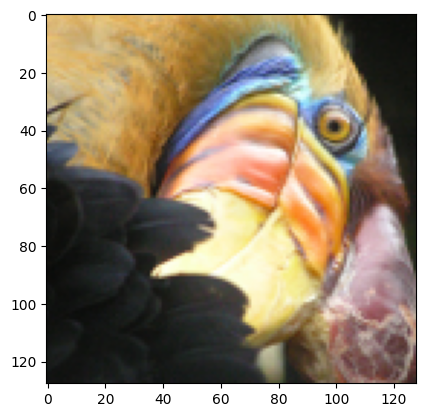

In [24]:
plt.imshow(original_img)

In [25]:
# Divide by 255 so that all values are in the range 0 - 1
original_img = original_img / 255

# Reshape the image into an m x 3 matrix where m = number of pixels
# (in this case m = 128 x 128 = 16384)
# Each row will contain the Red, Green and Blue pixel values
# This gives us our dataset matrix X_img that we will use K-Means on.

X_img = np.reshape(original_img, (original_img.shape[0] * original_img.shape[1], 3))
X_img.shape

(16384, 3)

In [31]:
# You should try different values of K and max_iters here
K = 16                       
max_iters = 10               

# Using the function you have implemented above. 
initial_centroids = init_centroids(X_img, K) 

# Run K-Means - this takes a couple of minutes
_, idx, centroids = run_Kmeans(X_img, max_iters, K) 

In [27]:
print("Shape of idx:", idx.shape)
print("Closest centroid for the first five elements:", idx[:5])

Shape of idx: (16384,)
Closest centroid for the first five elements: [5. 4. 4. 4. 5.]


In [32]:
# Represent image in terms of indices
X_recovered = centroids[idx.astype('int'), :] 

# Reshape recovered image into proper dimensions
X_recovered = np.reshape(X_recovered, original_img.shape) 

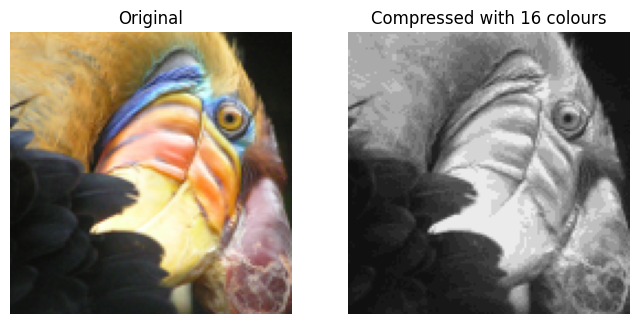

In [33]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(8,8))
plt.axis('off')

ax[0].imshow(original_img*255)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()